**Universidade Federal de Lavras**  
**Instituto de Ciências Exatas e Tecnológicas**  
**Departamento de Ciência da Computação**  
**GCC253 - Complexidade e Projetos de Algoritmos**  
Prof. Mayron César de O. Moreira  
Prof. Rafael Durelli

# Divisão e Conquista

> *Divide et impera*  
> - Caio Júlio César (Imperador Romano)  

A técnica de projeto de algoritmos denominada Divisão e Conquista resolve problemas recursivamente dividindo-os em vários subproblemas de dimensão inferior à original. Podemos resumir as etapas de um Algoritmo de Divisão e Conquista da seguinte forma:

- **Divisão:**  transforme o problema original em um conjunto de subproblemas de tamanho menor, que sejam mais fáceis de serem resolvidos;  
- **Conquista:**  considere a resolução dos subproblemas de forma que ao alcançarem um tamanho suficientemente pequeno, é possível de resolvê-los diretamente;  
- **Combinar:**  combine a solução dos subproblemas para a resolução do problema original.  

Para ilustrar o funcionamento de um algoritmo implementado por Divisão e Conquista, apresentamos cinco exemplos de problemas resolvidos por essa técnica. Além disso, dissertamos sobre formas de calcular a complexidade de algoritmos recursivos, através $(i)$ Resolução Direta de Recorrências; $(ii)$ Método da Substituição; $(iii)$ Método da Árvore de Recorrências; $(iv)$ Método Mestre.

## Problema 1: Busca pela subsequência máxima (Cormen et al., 2009)

Seja $A$ um vetor de inteiros composto por $n$ elementos. Suponha que o índice do vetor inicia com $0$ e termina com $n-1$. Queremos encontrar qual é a subsequência (subvetor, ou *subarray*) contínua de elementos cuja soma seja a maior possível. 

Exemplo: suponha que nosso vetor seja definido pela sequência:

* $$[13, -3, -25, 20, -3, -16, -23, 18, 20, -7, 12, -5, -22, 15, -4, 7].$$

Logo, a subsequência que produzirá a maior soma será a indicada pelos índices de $7$ a $10$, totalizando o valor de $43$ $(18 + 20 - 7 + 12)$. 


<u>Força-bruta</u>: Podemos resolver esse problema via força-bruta. Ao enumerar todas as possibilidades de soma de subsequências par a par, obtêm-se uma complexidade de $\displaystyle\binom{n}{2} \in \Theta(n^2)$ ($n$ elementos tomados $2$ a $2$).

In [35]:
def SubsequenciaMax_ForcaBruta(A, n):
  soma_parcial = 0
  melhor_soma = -10000000
  indice_esquerda = indice_direita = 0

  for i in range(n):
    soma_parcial = A[i]
    if(soma_parcial > melhor_soma):
      melhor_soma = soma_parcial
      indice_esquerda = indice_direita = i
      
    for j in range(i + 1, n):
      soma_parcial += A[j]
      if(soma_parcial > melhor_soma):
        melhor_soma = soma_parcial
        indice_esquerda = i
        indice_direita = j
    
  return (indice_esquerda, indice_direita, melhor_soma)

Teste: *SubsequenciaMax_ForcaBruta*.

In [36]:
#A = [13, -3, -25, 20, -3, -16, -23, 18, 20, -7, 12, -5, -22, 15, -4, 7]
A = [13, -3, -25, 20, -3]
indice_esquerda, indice_direita, melhor_soma = SubsequenciaMax_ForcaBruta(A, len(A))
print(indice_esquerda, indice_direita, melhor_soma)

3 3 20


<u>Divisão e Conquista</u>: pode-se melhorar o tempo de execução desse algoritmo modificando sua estratégia de resolução por meio da técnica de Divisão e Conquista. Para tanto, divide-se o vetor de tamanho $n$ da maneira mais equilibrada possível. Tomemos uma posição $m$, no meio da subsequência $A[e..d]$, em que $e$ e $d$ são os limites inferior e superior da subsequência, respectivamente. Logo, para qualquer vetor $A[i..j]$, temos três possibilidades para esse subproblema:  

- **Caso 1**: a solução está inteiramente na subsequência $A[e..m]$, para $e \le i \le j \le m$ ($i$ e $j$ estão dentro do intervalo de $e$ a $m$);  
- **Caso 2**: a solução está inteiramente na subsequência $A[m+1..d]$, para $m+1 \le i \le j \le d$ ($i$ e $j$ estão dentro do intervalo de $m+1$ a $d$);  
- **Caso 3**: a solução está em um ponto de cruzamento, de forma que $e \le i \le m < j$ ($i$ é menor ou igual a $m$, e $m$ é menor que $j$).  

O **Caso 3** pode ser tratado através de um algoritmo linear no tamanho do vetor $A$. Assim, dado um vetor $A[e..d]$ e seu índice do meio $m$, buscamos a melhor soma de $m$ a $e$, a adicionamos esse valor resultante à melhor soma de $m+1$ e $d$, como pode ser visto a seguir.

*Algoritmo linear para tratar o cruzamento de posições*

In [30]:
def CruzamentoPosicoes(A, indice_esquerda, indice_meio, indice_direita):
  soma_esquerda = soma_direita = -10000000
  melhor_indice_esquerda = melhor_indice_direita = 0
  
  soma_parcial = 0
  for i in range(indice_meio, indice_esquerda-1, -1):
    soma_parcial += A[i]
    if(soma_parcial > soma_esquerda):
      soma_esquerda = soma_parcial
      melhor_indice_esquerda = i

  soma_parcial = 0
  for j in range(indice_meio+1, indice_direita+1):
    soma_parcial += A[j]
    if(soma_parcial > soma_direita):
      soma_direita = soma_parcial
      melhor_indice_direita = j

  return (melhor_indice_esquerda, melhor_indice_direita, soma_direita + soma_esquerda)

*Recursão baseada na estratégia de Divisão e Conquista, dividindo o vetor em partes iguais*

In [31]:
def SubsequenciaMax_DivisaoConquista(A, indice_esquerda, indice_direita):
  if(indice_esquerda == indice_direita):
    return (indice_esquerda, indice_direita, A[indice_esquerda])

  indice_medio = (indice_esquerda + indice_direita) // 2
  melhores_valores_esquerda = SubsequenciaMax_DivisaoConquista(A, indice_esquerda, indice_medio)
  melhores_valores_direita = SubsequenciaMax_DivisaoConquista(A, indice_medio + 1, indice_direita)
  melhores_valores_cruzados = CruzamentoPosicoes(A, indice_esquerda, indice_medio, indice_direita)

  melhor_soma_esquerda = melhores_valores_esquerda[2]
  melhor_soma_direita = melhores_valores_direita[2]
  melhor_soma_cruzada = melhores_valores_cruzados[2]

  if(melhor_soma_esquerda >= melhor_soma_direita and melhor_soma_esquerda >= melhor_soma_cruzada):
    return melhores_valores_esquerda

  elif(melhor_soma_esquerda <= melhor_soma_direita and melhor_soma_cruzada <= melhor_soma_direita):
    return melhores_valores_direita

  return melhores_valores_cruzados

Teste: *SubsequenciaMax_DivisaoConquista*.

In [32]:
#A = [13, -3, -25, 20, -3, -16, -23, 18, 20, -7, 12, -5, -22, 15, -4, 7]
A = [13, -3, -25, 20, -3]
indice_esquerda, indice_direita, melhor_soma = SubsequenciaMax_DivisaoConquista(A, 0, len(A) - 1)
print(indice_esquerda, indice_direita, melhor_soma)

3 3 20


Note que a complexidade do algoritmo de divisão e conquista pode ser dado pela recorrência $T(n)$:

$$T(n) = \begin{cases} 1 & n=1 \\ 2T\displaystyle\left(\left\lfloor\dfrac{n}{2}\right\rfloor\right) + n & \forall n \ge 2 \end{cases}$$.

$T(n) \in O(nlog\,n)$ (para ser mais preciso, pode-se dizer que $T(n) \in \Theta(nlog\,n))$, superando o algoritmo força-bruta. Na sequência, apresentam-se maneiras de justificar complexidades como essas.

## Resolução Direta de Recorrências (Feofiloff, 2013)

Nos exemplos a seguir, consideramos a função de recorrência $T:\mathbb{N}\rightarrow \mathbb{R}_+$.




De acordo com o **"Problema 1 - Busca pela subsequência máxima"**, a complexidade do algoritmo de divisão e conquista proposto é limitado superiormente por $nlog\,n$ operações. Pode-se resolver diretamente a recorrência anteriormente proposta por:

$$T(n) = \begin{cases} 1 & n=1 \\ 2T\displaystyle\left(\left\lfloor\dfrac{n}{2}\right\rfloor\right) + n & \forall n \ge 2 \end{cases}$$.

*Solução.* Não pode-se desenvolver a recorrência acima eliminando os operador "chão" de uma divisão real, visto que $\dfrac{n}{2}$ pode gerar um número real, fora do domínio de $T(n)$. Para simplificar, inicialmente, adota-se valores de $n$ escritos como uma potência de 2, isto é: $n = 2^j$, $j \ge 1$.



\begin{eqnarray}
 T(n) &=& 2T(n/2) + n      \nonumber \\
   &=& 2(2T(n/2^2) + n/2) + n \nonumber \\
   &=& 2(2(2T(n/2^3) + n/2^2) + n/2) + n \nonumber \\
   &=& 2^3T(n/2^3) + 2(2n/2^2 + n/2) + n\nonumber \\
   &=& 2^3T(n/2^3) + 3n\nonumber \\
   &=& ... \nonumber \\
\end{eqnarray}


Após $k$ passos, tem-se:

\begin{eqnarray}
 T(n) &=& 2^kT(n/2^k) + kn\nonumber 
\end{eqnarray}

Como o passo base é dado por $n=1$, a recorrência pára quando $n/2^k = 1$, o que implica que $k = log\,n$. Portanto:

\begin{eqnarray}
 T(n) &=& 2^{log\,n}T(n/2^{log\,n}) + (log\,n)n\nonumber \\
   &=& nT(n/n) + n(log\,n)\nonumber\\
   &=& nT(1) + n(log\,n)\nonumber\\
   &=& n + nlog\,n\nonumber
\end{eqnarray}


Assim, $T(n) = nlog\,n + n$.  



Apesar de definida uma fórmula fechada para $T(n)$, o desenvolvimento se restringiu a potências de 2. No entanto, pode-se encontrar um limite superior para $T(n)$ e descobrir qual função limita superiormente e/ou inferiormente $T(n)$. De fato, prova-se na sequência que $T(n) \in \Theta(nlog\,n)$. 


*Resultado 1.* Mostra-se que $T(n)$ é crescente. Pelo Princípio da Indução Matemática, sabe-se que T(1) = 1 < T(2) = 4 (Passo Base). 

Agora, toma-se $n \ge 2$. 

Se $n$ é par, sabe-se que $T(n) < T(n) + 1$. Ora:

\begin{eqnarray}
 T(n) + 1 &=& 2T(\frac{n}{2}) + n+1\nonumber \\
   &=& 2T(\lfloor\frac{n+1}{2}\rfloor) + (n + 1)\nonumber\\
   &=& T(n+1)\nonumber
\end{eqnarray}

Se $n$ é ímpar, pela Hipótese Indutiva, tem-se:

\begin{eqnarray}
 T(\frac{n-1}{2}) &\le& T(\frac{n-1}{2} + 1)\nonumber
\end{eqnarray}

Mas $T(\frac{n-1}{2} + 1) = T(\frac{n+1}{2})$, o que nos mostra que $T(n)$ é crescente.  



*Resultado 2.* $T(n) \in \Theta(n\log\,n)$. Toma-se um $j$ natural tal que $2^j \le n < 2^{j+1}$. Sabe-se que $T(n) = nlog\,n + n$.

Visto que $T(n)$ é crescente, pode-se dizer que:

$$T(n) < T(2^{j+1}) = 2^{j + 1} + 2^{j+1}(log\,2^{j+1}) = (j+2)2^{j+1} \le (j+2j)2^{j+1}=3j2^{j+1}.$$

Por conseguinte, $T(n) < 6j2^{j}$.

Como $2^j \le n$, o que implica que $j \le log\,n$, então $6j2^j \le 6nlog\,n$ e, portanto, $T(n) \in O(nlog\,n)$.  

Por outro lado, $T(2^j) \le T(n)$ e $T(2^j) = (j+1)2^j = \frac{1}{2}(j+1)2^{j+1}$. Como $log\,n < j+1$, temos $\frac{1}{2}nlog\,n < T(2^j) \le T(n)$. Portanto, $T(n) \in \Omega(n\log\, n)$.

### Exemplo 1

Encontre uma fórmula para a a recorrência:

$$T(n) = \begin{cases} 1 & n=1 \\ 2T(n-1) + 1 & \forall n \ge 2 \end{cases}$$.



*Solução.* Note que a recorrência $T(n)$ pode ser desenvolvida da seguinte forma:

\begin{eqnarray}
 T(n) &=& 2T(n-1) + 1      \nonumber \\
   &=& 2(2T(n-2) + 1) + 1 \nonumber \\
   &=& 2^2T(n-2) + 3 \nonumber \\
   &=& 2^2(2T(n-3)+1) + 2^2 - 1 \nonumber \\
   &=& 2^3T(n-3) + 7 \nonumber \\
   &=& 2^3T(n-3) + 2^3 - 1 \nonumber \\
   &=& ... \nonumber \\
   &=& 2^jT(n-j) + 2^{j} - 1 \nonumber \\
   &=& ... \nonumber \\
   &=& 2^{n-1}T(n-(n-1)) + 2^{n-1} - 1 \nonumber \\
   &=& 2^{n-1} + 2^{n-1} - 1 \nonumber \\
   &=& 2^{n} - 1 \in \Theta(2^n). \nonumber
\end{eqnarray}



## Problema 2: Sequência ciclicamente ordenada

Dada uma sequência $s=s_1, s_2, ..., s_n$, seja $s_i$, $1 \le i \le n$, o menor elemento da sequência. Diz-se que a sequência $s=s_1,s_2,...,s_n$ está **ciclicamente ordenada** se $s_i, s_{i+1}, s_{i+2}, ..., s_n, s_1, s_2, ..., s_{i-1}$ está ordenada de forma crescente. Encontre a posição $i$ que respeita a propriedade de ser **ciclicamente ordenada**. Por simplicidade, **supõe-se que essa posição seja única**.  

  * *Exemplo:* se $s=(25, 30, 45, 50, 8, 12, 17, 22)$, então $i=5$, com $s_5=8$.

O "*Problema 2 - Sequência ciclicamente ordenada*" trata-se de uma variação da busca binária. Considera-se $s[1..n]$ um vetor que representa a sequência. Além disso, dadas uma posição mediana $m$ e os valores de intervalos inferior e superior representados por $e$ e $l$, respectivamente, verifica-se:  

* Se $s[m] < s[l]$, pode-se afirmar que o menor elemento não está entre $s[m+1], s[m+2], ..., s[l]$. Portanto, chama-se recursivamente para $s[l..m]$.  
* Caso contrário, afirma-se que o menor elemento não está entre $s[e], s[e+1], ..., s[m-1]$. Portanto, chama-se recursivamente para $s[m..l]$.  

In [ ]:
def BuscaBinaria_Ciclica(sequencia, indice_esquerdo, indice_direito):
  if(indice_esquerdo == indice_direito):
    return indice_esquerdo 

  else:
    indice_mediano = (indice_esquerdo + indice_direito) // 2
    if(sequencia[indice_mediano] < sequencia[indice_direito]):
      return BuscaBinaria_Ciclica(sequencia, indice_esquerdo, indice_mediano)

    else:
      return BuscaBinaria_Ciclica(sequencia, indice_mediano + 1, indice_direito)


Teste: *BuscaBinaria_Ciclica*.

In [ ]:
sequencia = [25, 30, 45, 50, 8, 12, 17, 22]
indice_ciclico = BuscaBinaria_Ciclica(sequencia, 0, len(sequencia) - 1)
print(indice_ciclico)
indice = indice_ciclico + 1

impressao = str(sequencia[indice_ciclico]) + " "
while(indice != indice_ciclico):
  impressao += str(sequencia[indice]) + " "
  indice = (indice + 1) % len(sequencia)
print(impressao)

4
8 12 17 22 25 30 45 50 


A função *BuscaBinaria_Ciclica* tem a complexidade definida por:

$$T(n) = \begin{cases} 1 & n=1 \\ T(n/2) + 1 & \forall n \ge 2 \end{cases}$$.

A determinação da complexidade da recorrência acima será feita pelo **Método da Árvore da Recorrência**.

## Método da Árvore de Recorrências

O Método da Árvore de Recorrências consiste em analisar a árvore de recursão de maneira explícita. Cada vértice da árvore representa um subproblema. Computa-se o tempo gasto por cada vértice, e seus filhos indicam as outras chamadas recursivas advindas do pai.

Por fim, a complexidade da recursão é o somatório do custo de todos os níveis da árvore. Trata-se de uma maneira visualmente intuitiva de avaliar a complexidade de um algoritmo recursivo.

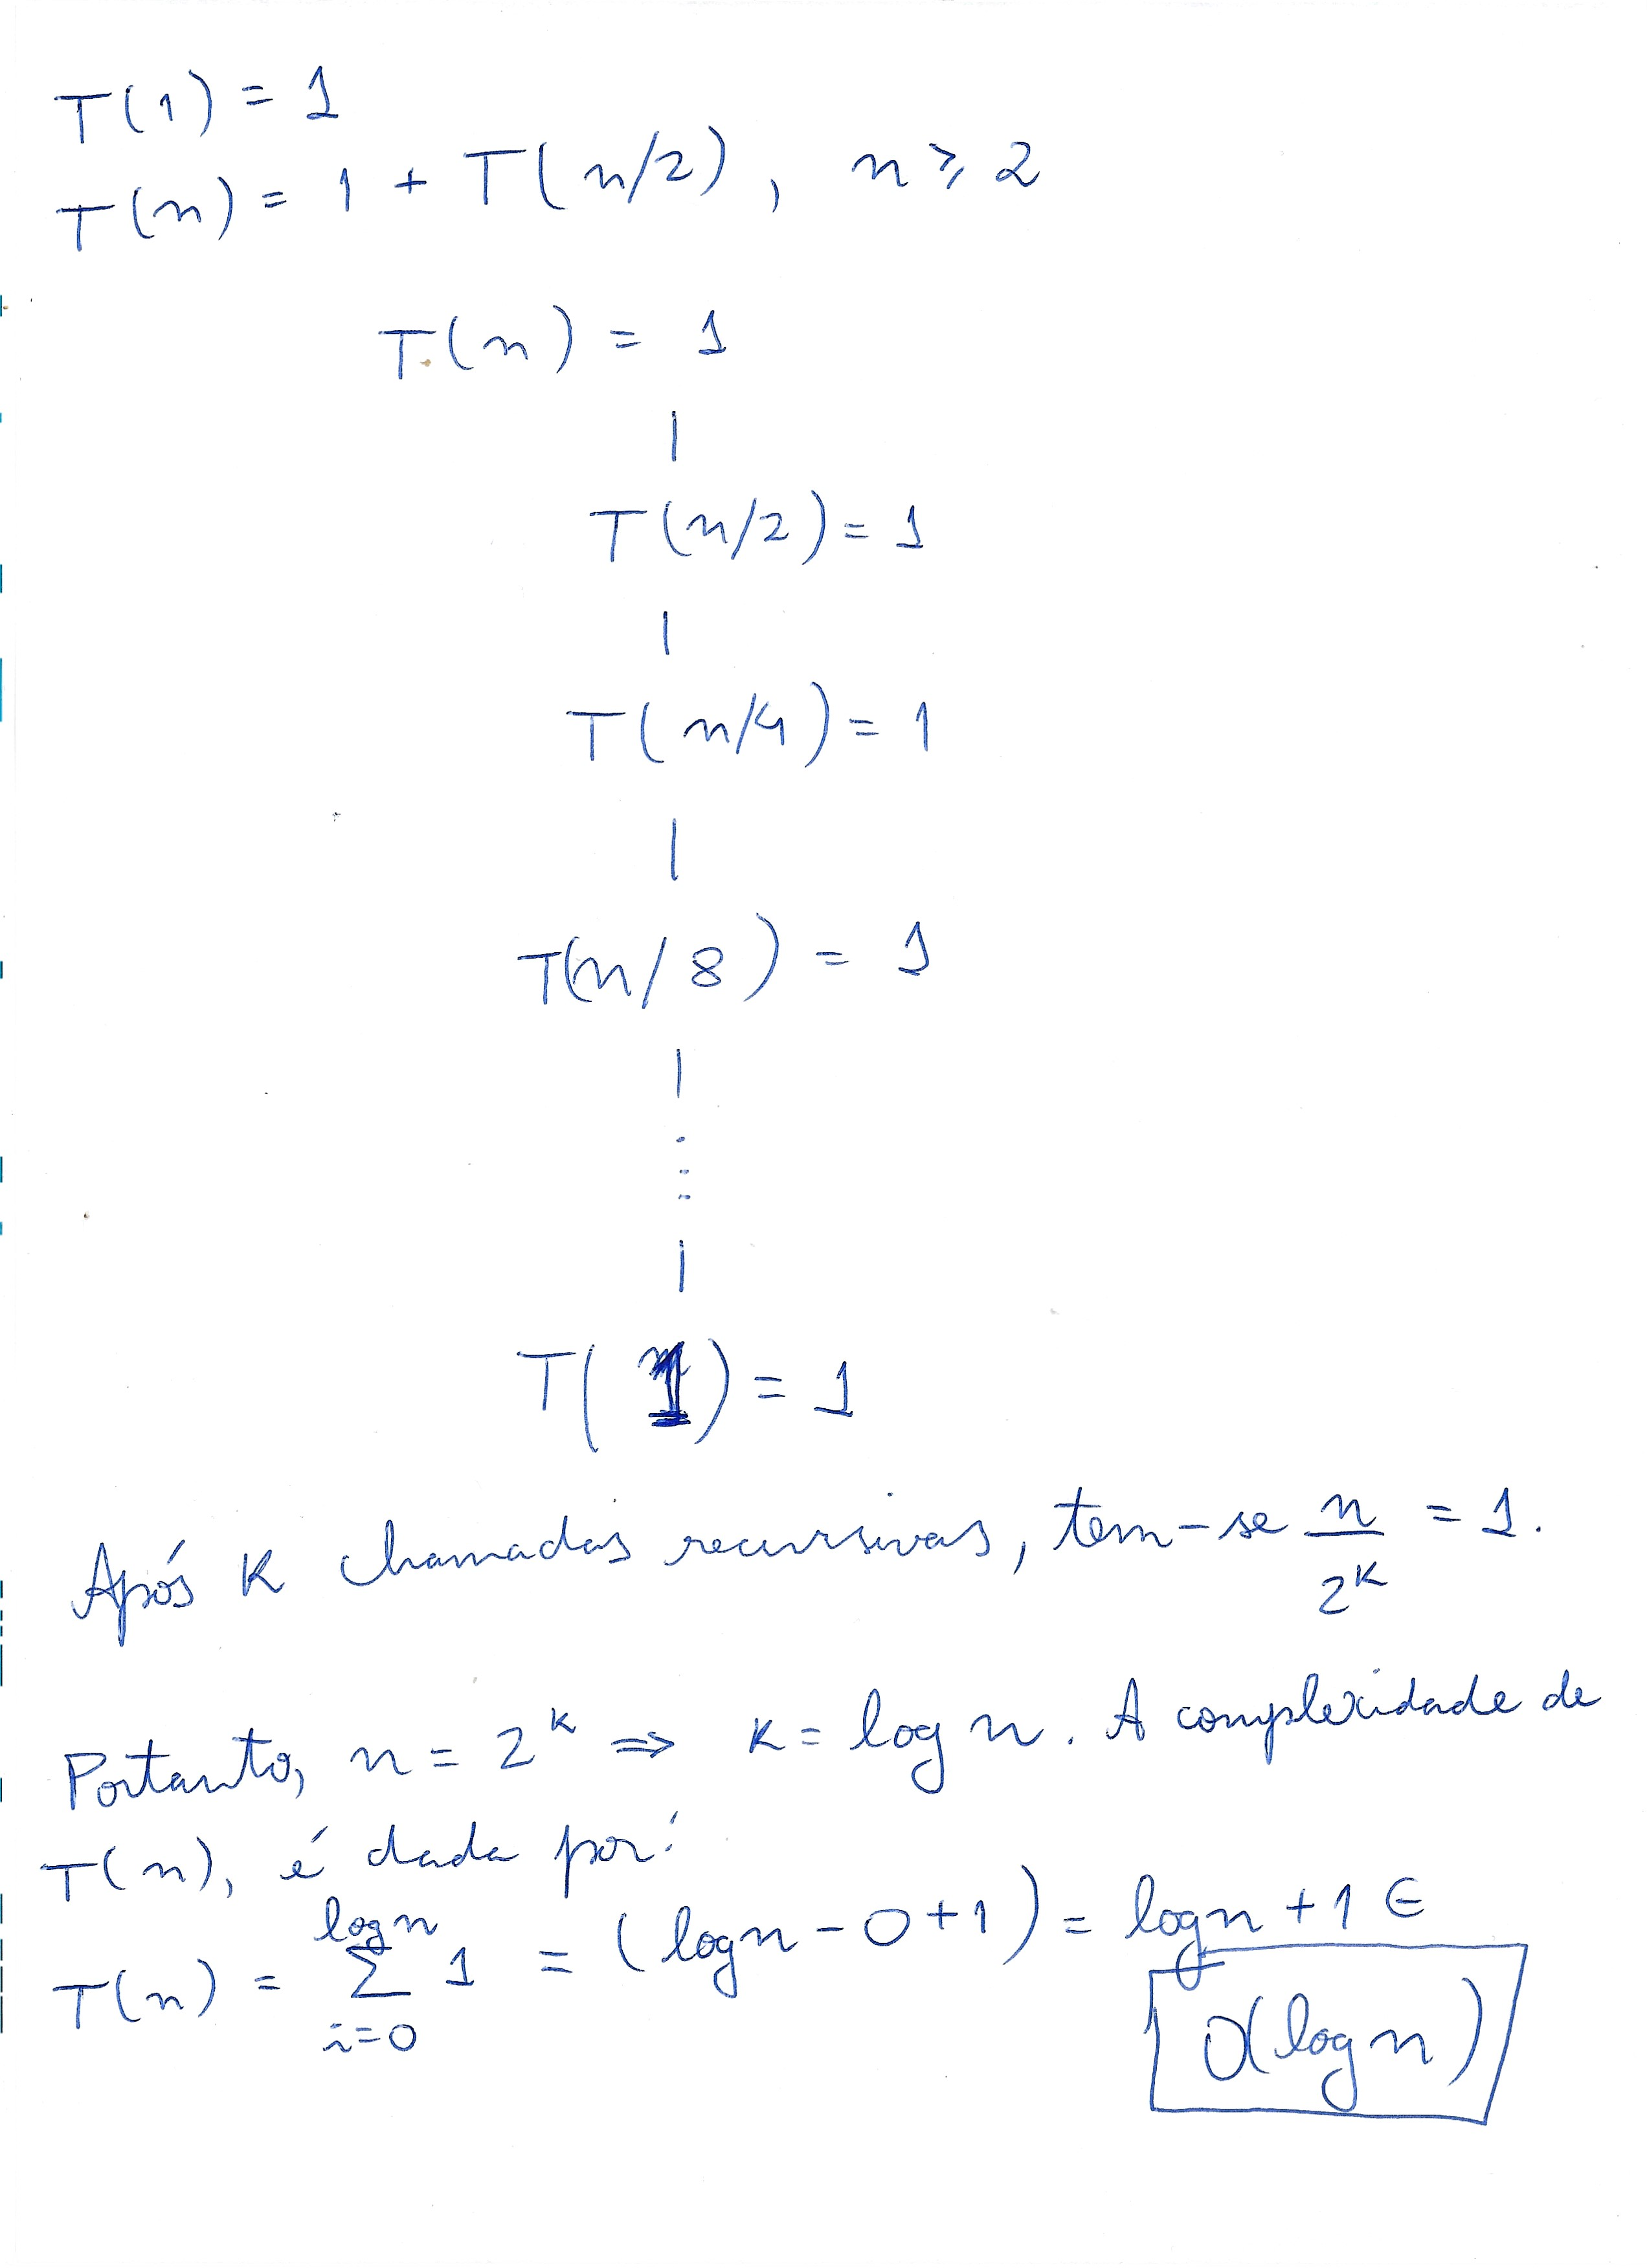

### Exemplo 1

Encontre a complexidade de $T(n) = 3T(n/4) + cn^2$ pelo Método da Árvore de Recorrências.

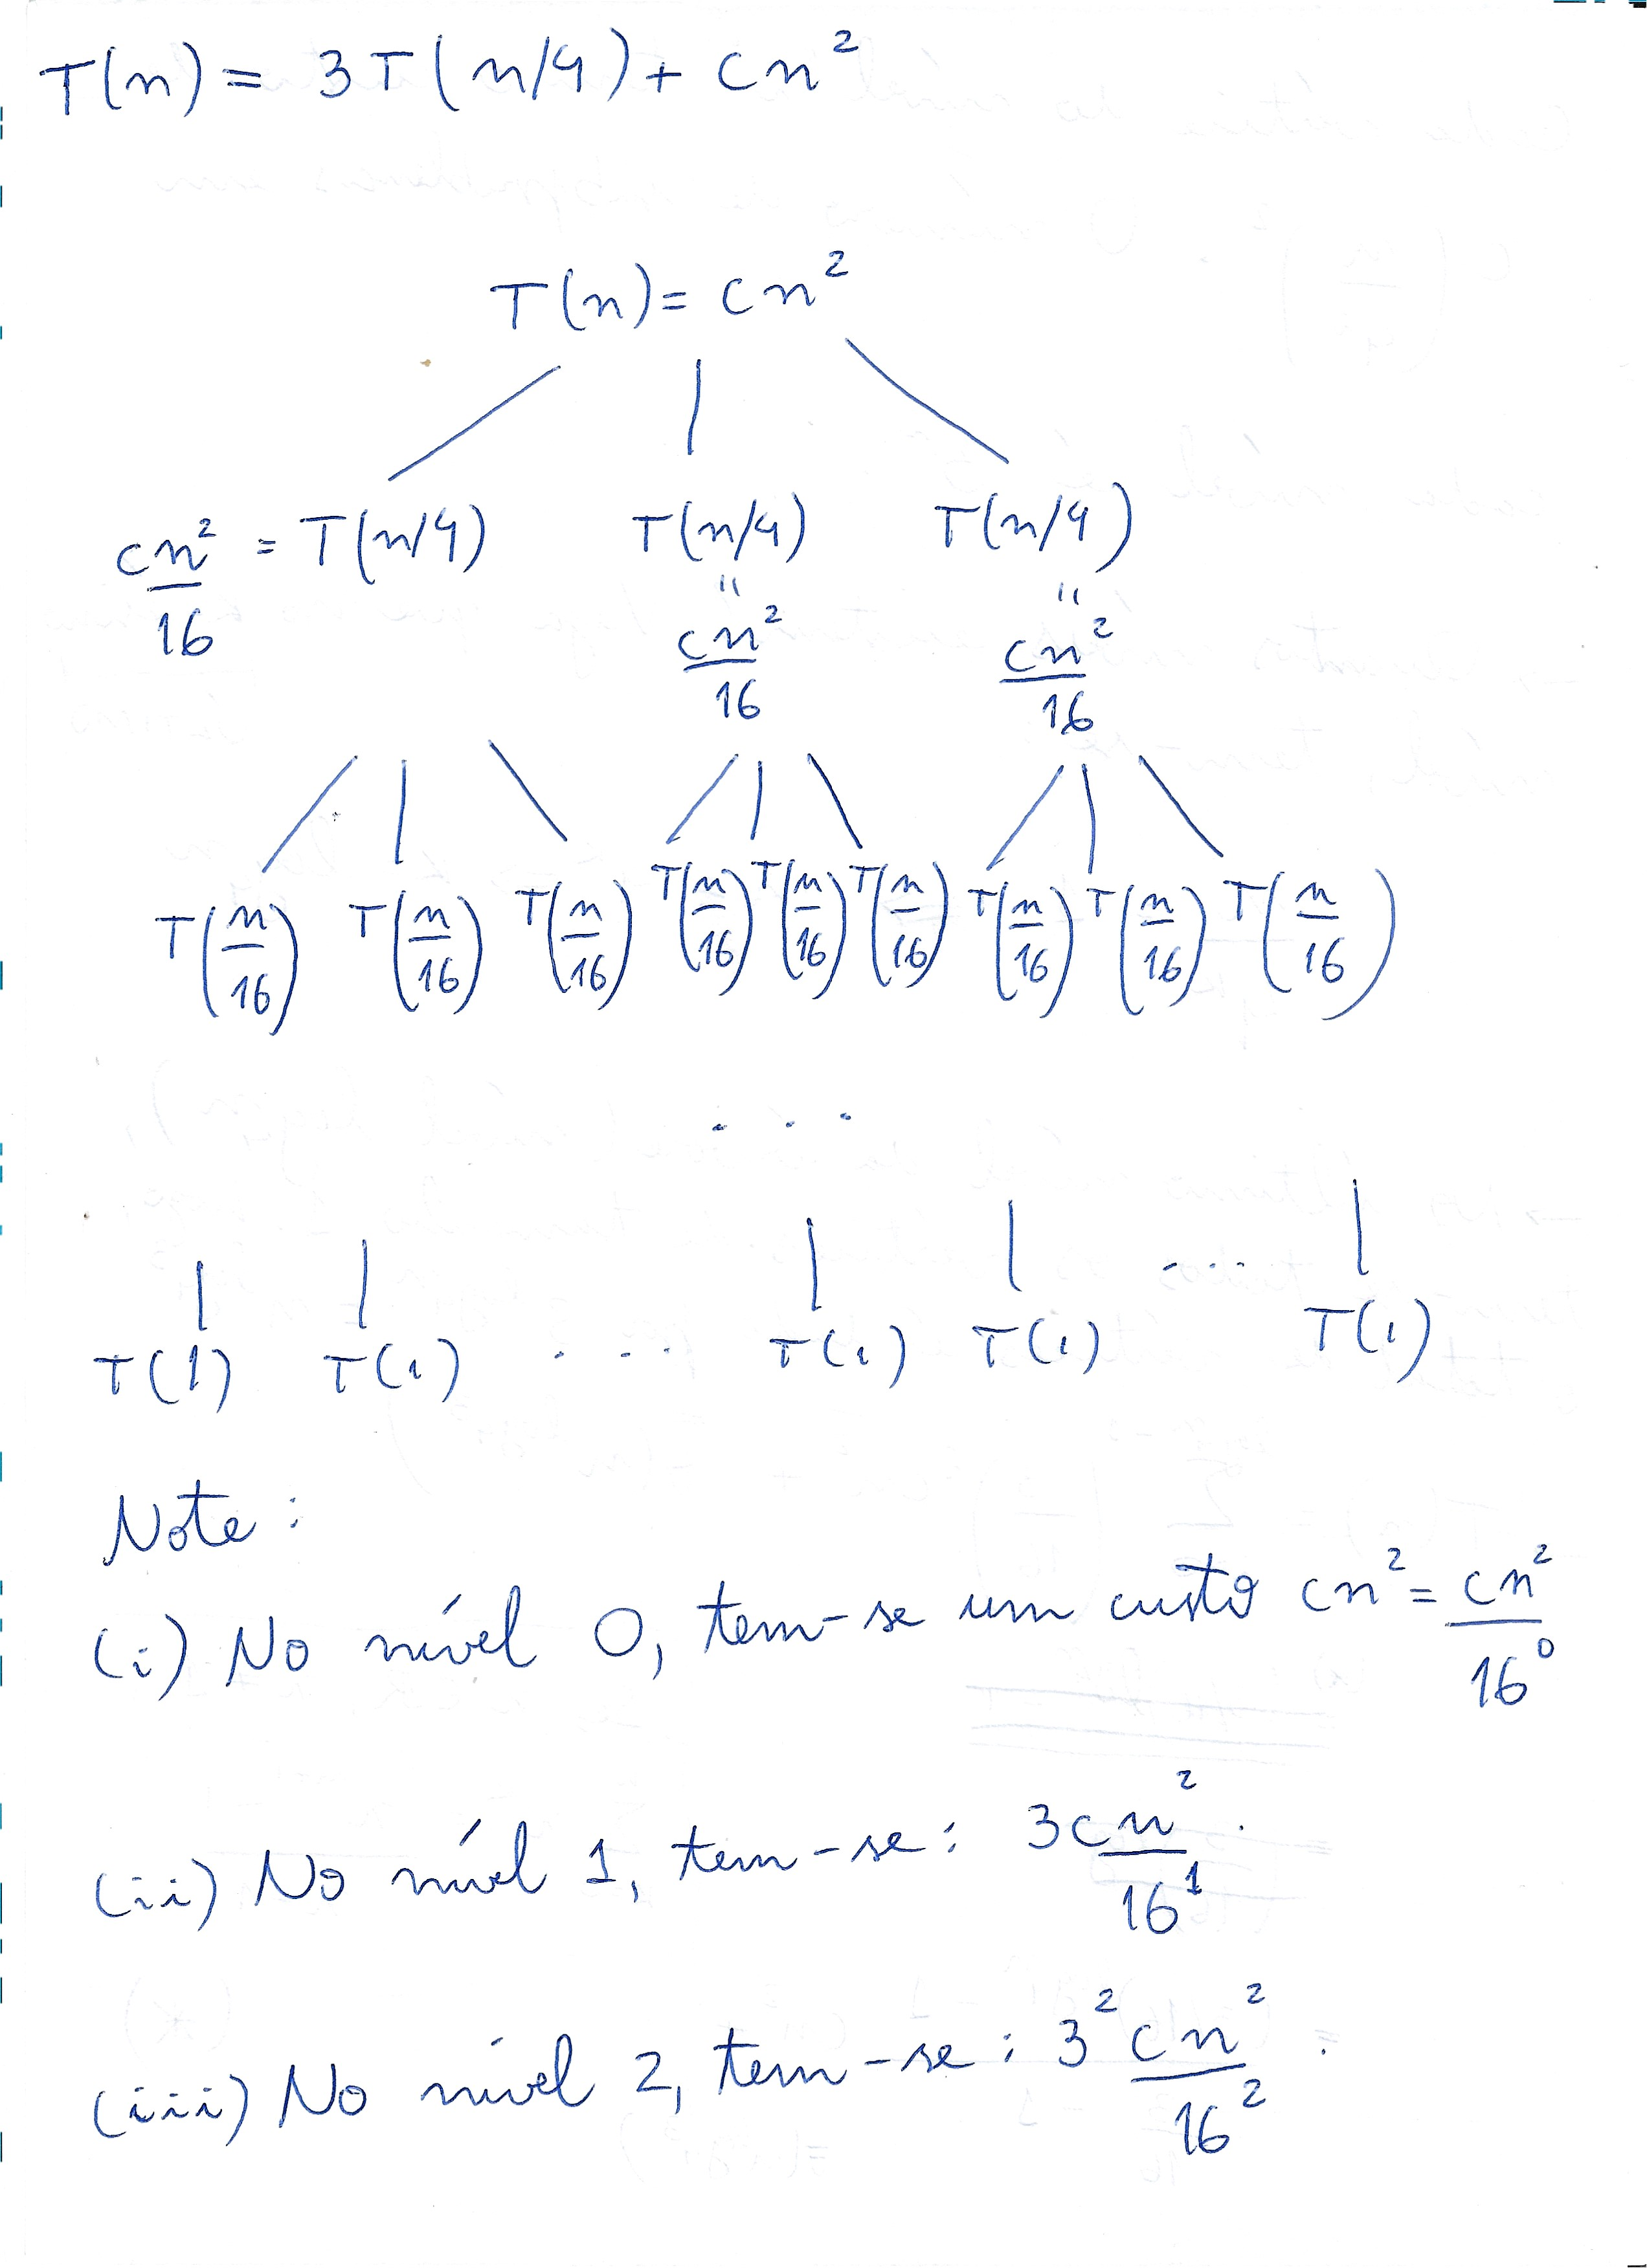

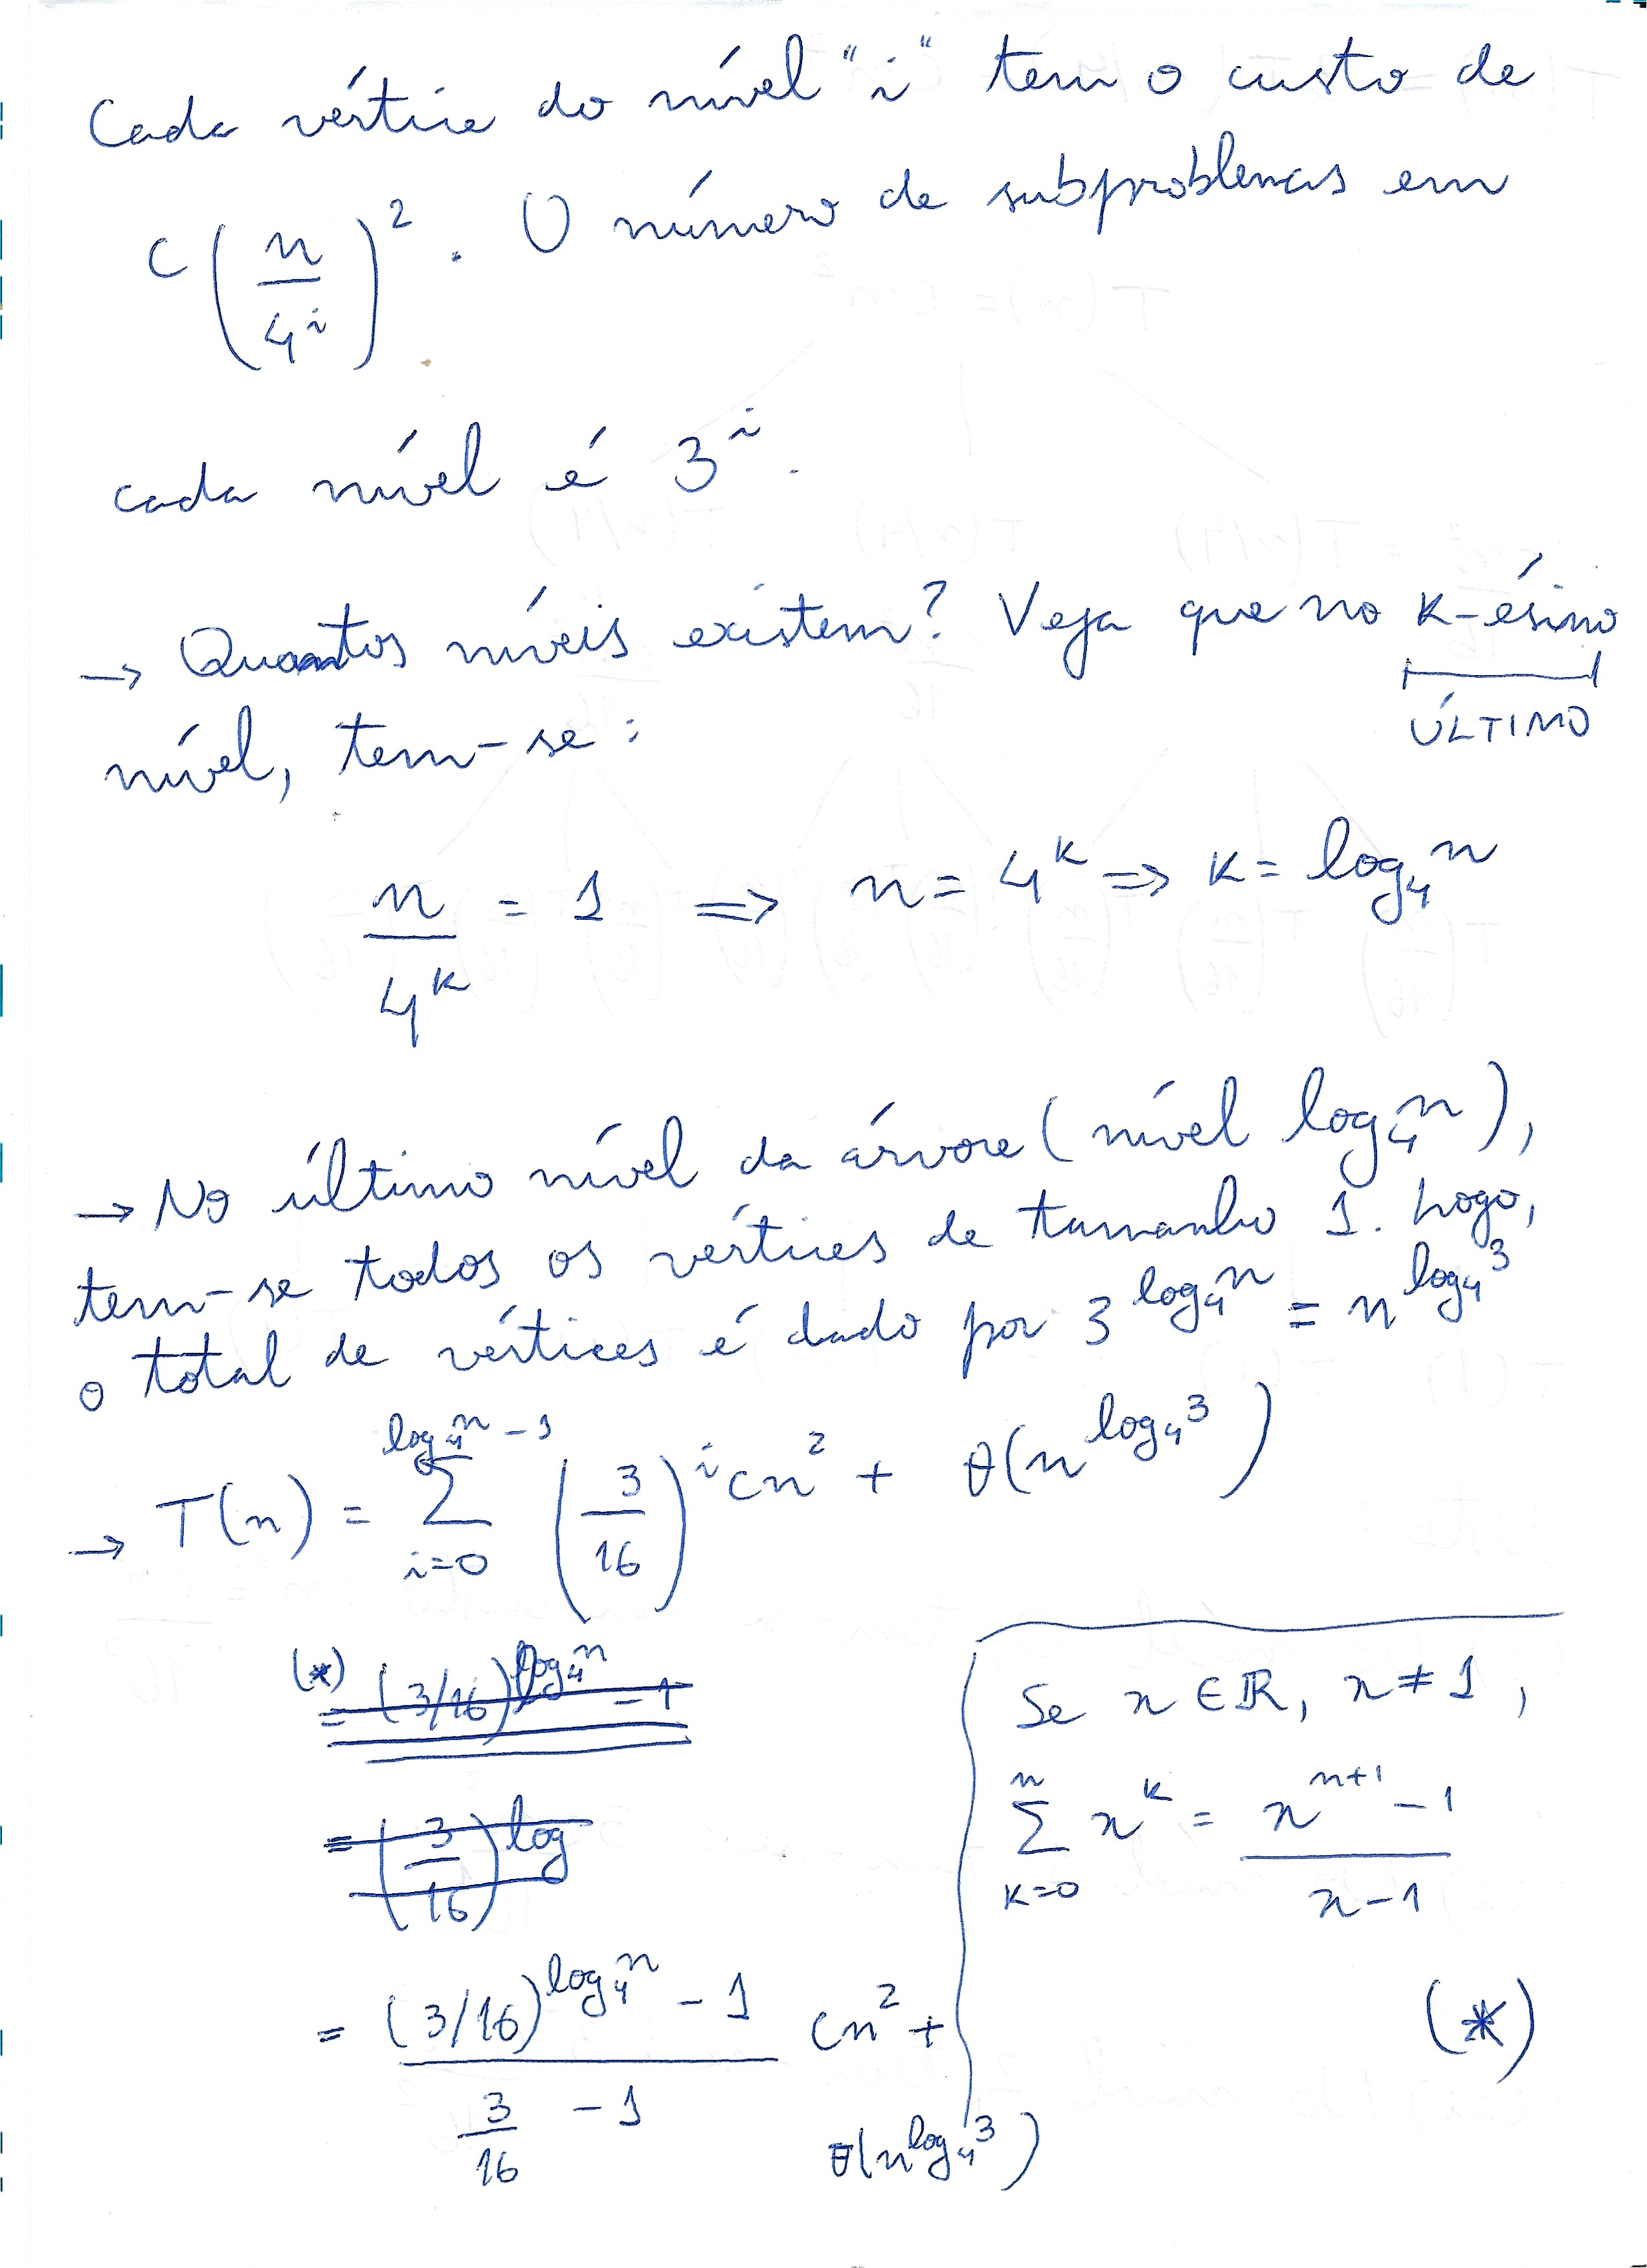

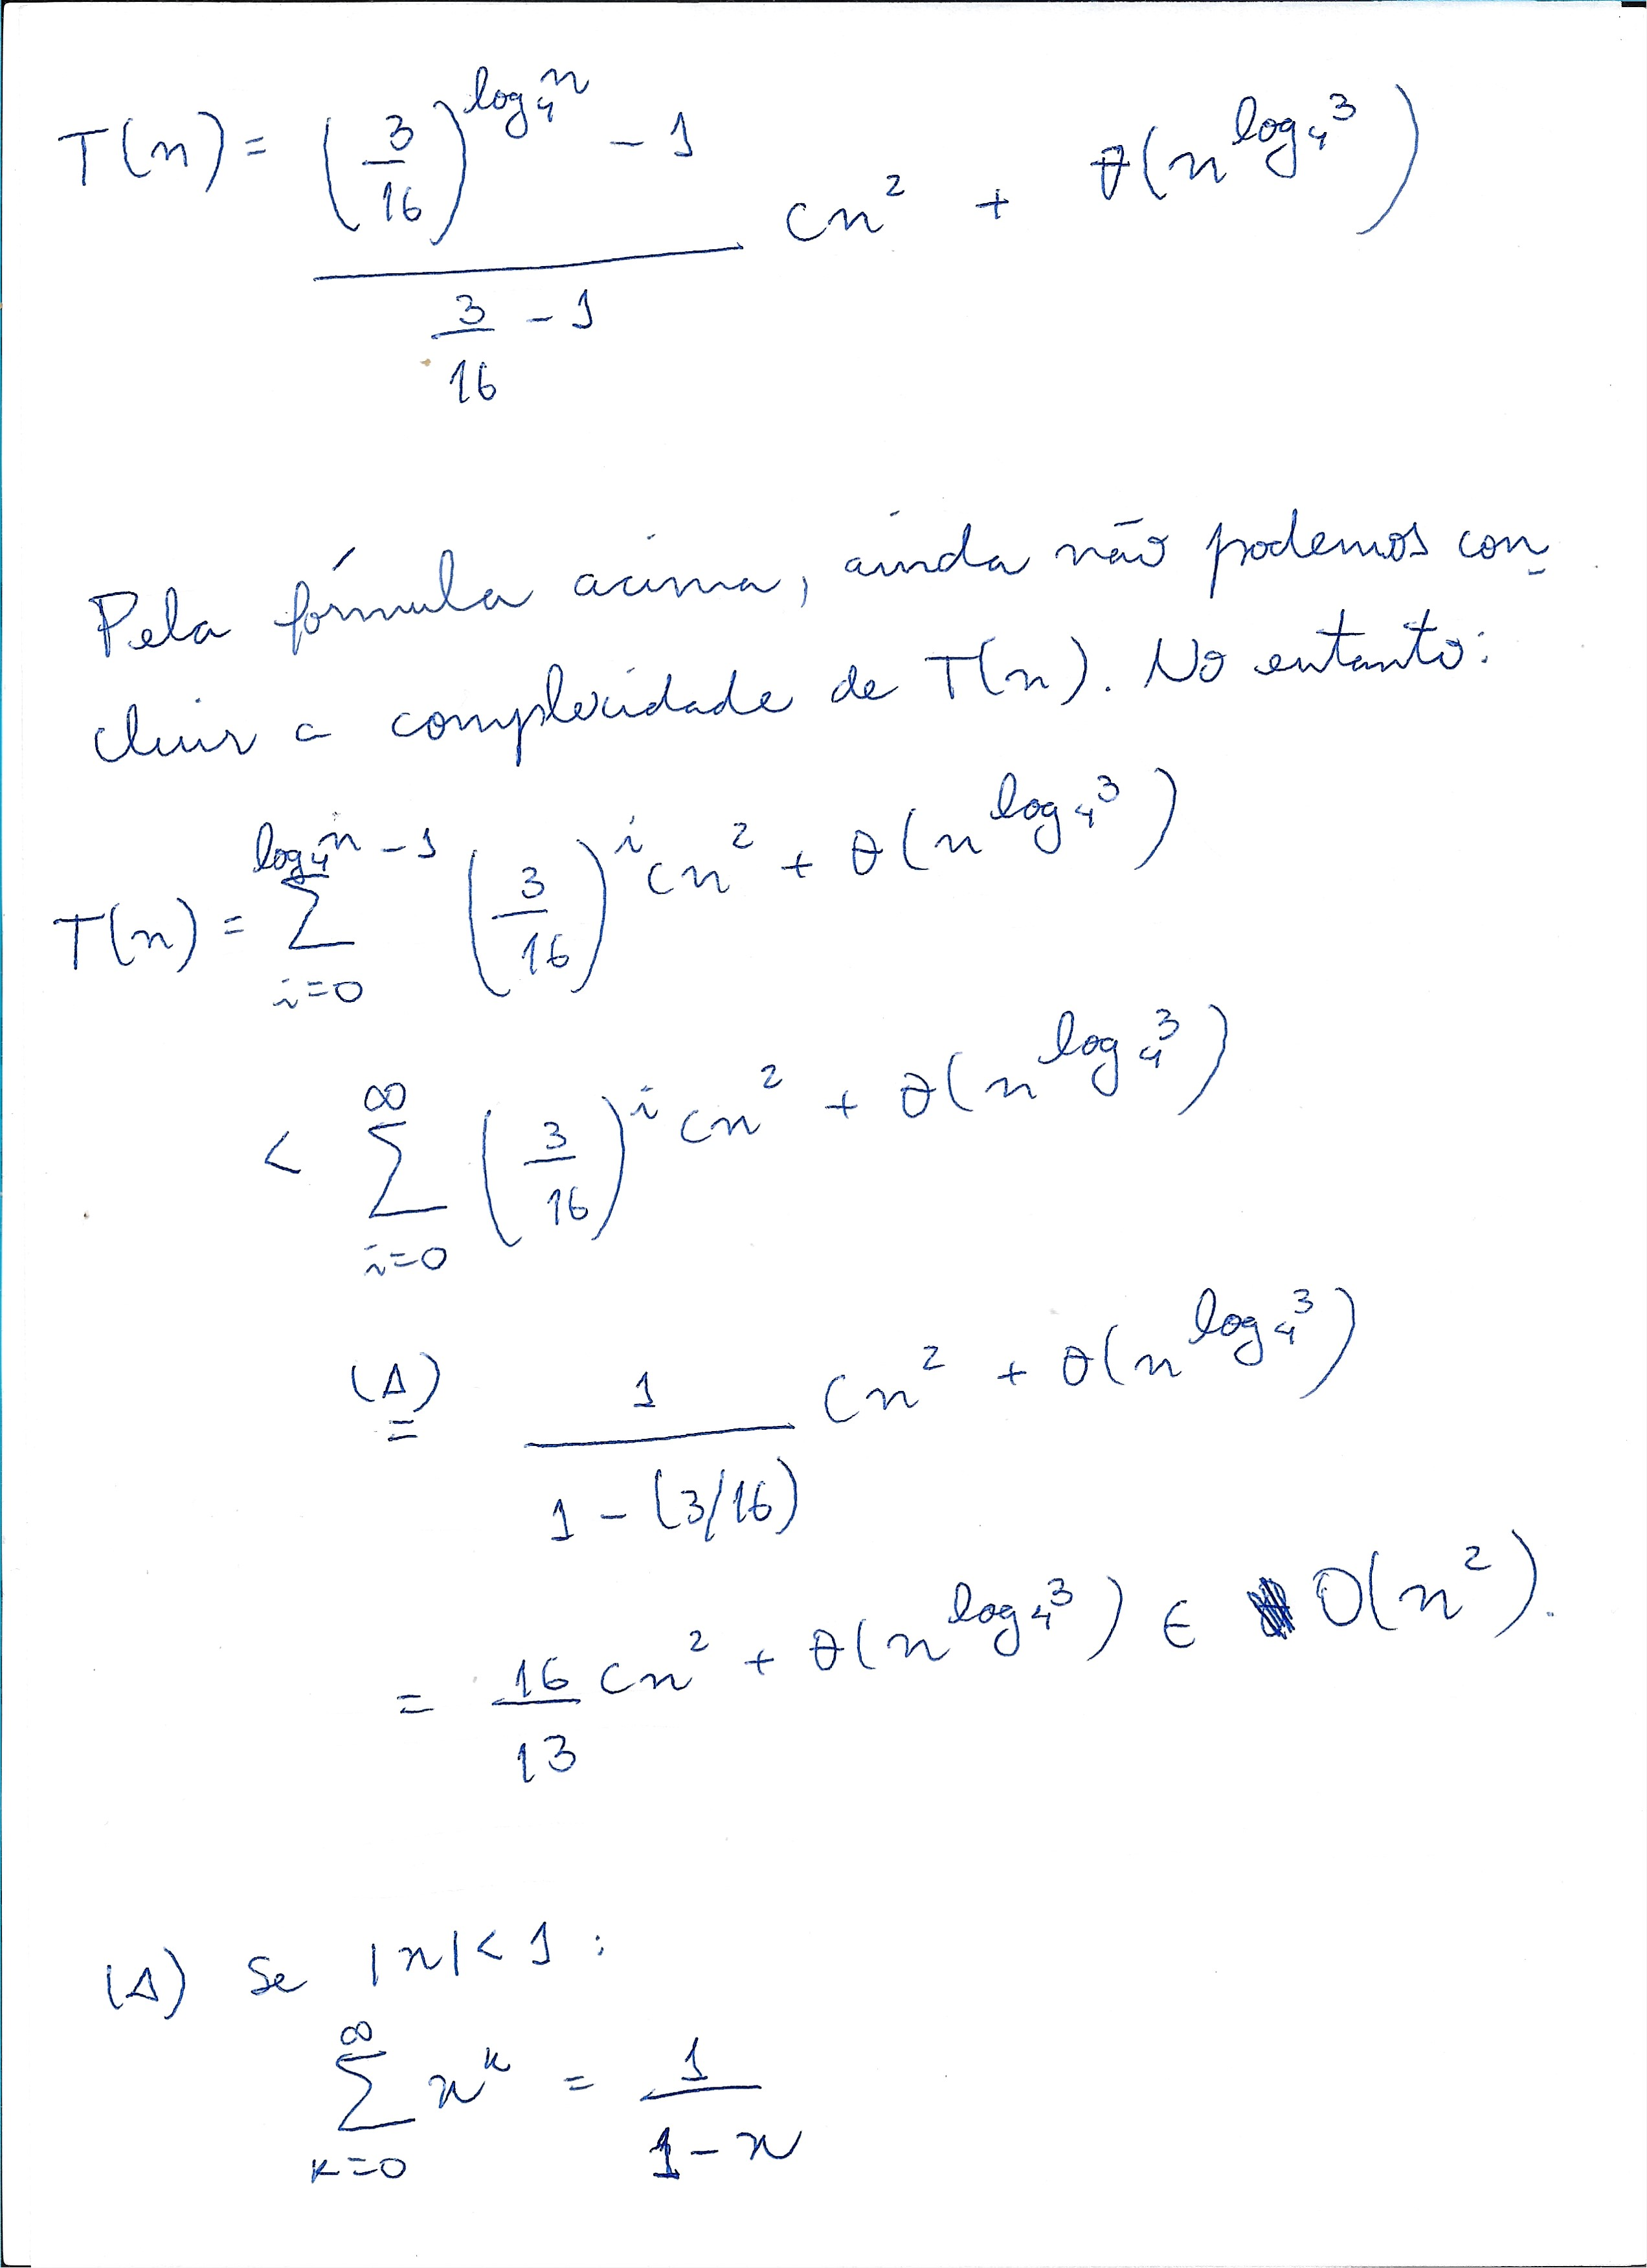

## Referências

* Cormen, T. H, Leiserson, C. E., Rivest, R. L., and Stein, C. (2009). Introduction to algorithms. MIT press.  

* Feofiloff, P. (2013). Minicurso de Análise de Algoritmos. URL=[https://www.ime.usp.br/~pf/livrinho-AA/](https://www.ime.usp.br/~pf/livrinho-AA/). Acessado em 22/01/2023.
